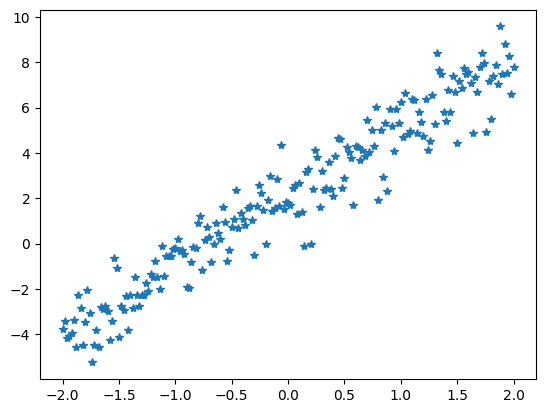

In [1]:
# Aprendendo a tratar dados
import tensorflow as tf
import matplotlib.pyplot as plt

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

TRUE_W = 3.0
TRUE_B = 2.0

NUM_EXAMPLES = 201
x = tf.linspace(-2,2, NUM_EXAMPLES)
x = tf.cast(x, tf.float32)

def f(x):
    return x * TRUE_W + TRUE_B

noise = tf.random.normal(shape=[NUM_EXAMPLES])

y = f(x) + noise

plt.plot(x, y, '*')
plt.show()

In [45]:
import tensorflow as tf

def parse_object_to_tensor(obj):
    tensor = []
    for key in obj:
        if type(obj[key]) is dict:
            for dpth_key in obj[key]:
                tensor.append(tf.data.TextLineDataset(obj[key][dpth_key]))
        else:
            tensor.append(tf.data.TextLineDataset(obj[key]))
    return tensor

obj = {"a": "12", "b": {"nm": "13"}, "c": "ajsodjsa"}

a = tf.data.experimental.SqlDataset('bigQuery', 'an', "SELECT * FROM ALL")

print(a)

<_TensorDataset element_spec=DatasetSpec(TensorSpec(shape=(), dtype=tf.string, name=None), TensorShape([3]))>


In [1]:
# Obtendo dados do BiqQuery
from google.cloud import bigquery
import json
import pandas as pd

client = bigquery.Client()

query_job = client.query(
    """
    SELECT positions_member, positions_index, l.squads_member FROM 
    `growyxprod.firebase_projects.post_schema_projectPositions_latest` 
    AS q INNER JOIN `growyxprod.firebase_projects.post_schema_projectsSquad_latest` 
    AS l ON q.positions_index = l.squads_index AND q.document_id = l.document_id
    """
)

result = query_job.result()

tensor = []
vector = []

for row in result:
    # print(type(row.positions_member))
    if (type(row.positions_member) == str):
        tensor.append(json.loads(row.positions_member))
    else:
        continue
    if (row.squads_member == "not found" or row.squads_member == "notFound" or row.squads_member == "Not found"):
        vector.append(0)
    if (row.squads_member != "not found" and row.squads_member != "notFound" and row.squads_member != "Not found"):
        # print(row.squads_member)
        vector.append(json.loads(row.squads_member))

# print(tensor[1400])

df = pd.json_normalize(tensor)
vc = pd.json_normalize(vector)

df['jobTitle'] = df['jobTitle'].fillna(0)
df['skills'] = df['skills'].fillna('[]')
df['skills'] = ','.join(df['skills'][0])
df['softwares'] = ','.join(df['softwares'][0])
df['codeLanguage'] = ','.join(df['codeLanguage'][0])
df['database'] = df['database'].fillna('[]')
df['database'] = ','.join(df['database'][0])
# df['databases'] = df['databases'].fillna('[]')
# df['databases'] = ','.join(df['databases'][0])
df['methodology'] = df['methodology'].fillna('[]')
df['methodology'] = ','.join(df['methodology'][0])
# df.drop(df[(df['jobTitle'] == 0)].index, inplace=True)
# print(df.head())
df.shape
# df.head()


(1028, 65)

In [2]:
intire = pd.concat([df,vc],axis=1)
intire.dropna(subset=['login.uid'], inplace=True)

df = intire[['codeLanguage','database','jobTitle','skills','softwares', 'hourValue']]
vc = intire[['login.uid']]

In [3]:

vc.head()

,login.uid
2,5YgVZbPr9Be66a6I7SPjrsOtDB63
11,JPItjlpwsZhYASMV8wihrJX8af63
14,04SAwjGh9bSoGVyvzitBSUNSH9W2
17,QVniZRFfs4brJBlxpHDCtFnbGXw1
18,4mkekIdzixbwMEEzGCMYqW6USFF3


In [4]:
vc.shape
df.shape

(731, 6)

In [5]:

selecteds_query_job = client.query(
    """
    SELECT document_id, quizPersonality_profile_personal, quizSoftSkills_profile_trustiness,
     quizSoftSkills_profile_innovation, quizSoftSkills_profile_purpose,
     quizSoftSkills_profile_mentalSecurity, quizSoftSkills_profile_totalPoints,
     quizSoftSkills_profile_teamWork, quizSoftSkills_profile_level,
       wages_currency, wages_hourGrossValue,
       experience_jobTitle, experience_level, experience_workAvailability,
        quizCulture_profile_adhocracia, quizCulture_profile_cla,
         quizCulture_profile_hierarchy, quizCulture_profile_market,
          quizPersonality_profile_calm, quizPersonality_profile_selfEsteem, 
           quizPersonality_profile_trustworthy, quizPersonality_profile_conformity,
            quizPersonality_profile_discerening, quizPersonality_profile_careful,
             quizPersonality_profile_dominance, quizPersonality_profile_enthusiastic,
              quizPersonality_profile_spontaneous, quizPersonality_profile_stability,
               quizPersonality_profile_influence, quizPersonality_profile_influencer,
                quizPersonality_profile_selfish, quizPersonality_profile_objective,
                 quizPersonality_profile_organized, quizPersonality_profile_optimist,
                  quizPersonality_profile_listener, quizPersonality_profile_patient,
                   quizPersonality_profile_persuasive, quizPersonality_profile_planner,
                    quizPersonality_profile_precision, quizPersonality_profile_radical,
                     quizPersonality_profile_visionary,  FROM `growyxprod.firestore_export.posts_schema_bqUsers_latest`
    """
)

selectedes = selecteds_query_job.to_arrow().to_pandas()

dt = selectedes
# dt.drop(['document_name', 'document_id', 'timestamp', 'operation', 'login_providerId'], axis='columns', inplace=True)
ks = pd.DataFrame(dt)
ks.head()

,document_id,quizPersonality_profile_personal,quizSoftSkills_profile_trustiness,quizSoftSkills_profile_innovation,quizSoftSkills_profile_purpose,quizSoftSkills_profile_mentalSecurity,quizSoftSkills_profile_totalPoints,quizSoftSkills_profile_teamWork,quizSoftSkills_profile_level,wages_currency,...,quizPersonality_profile_objective,quizPersonality_profile_organized,quizPersonality_profile_optimist,quizPersonality_profile_listener,quizPersonality_profile_patient,quizPersonality_profile_persuasive,quizPersonality_profile_planner,quizPersonality_profile_precision,quizPersonality_profile_radical,quizPersonality_profile_visionary
0,LVKBHOgAVxTQEsGRicAb6woOpq03,None,10.000000000,12.000000000,12.000000000,14.000000000,60.000000000,12.000000000,None,BRL,...,60.000000000,80.000000000,60.000000000,60.000000000,60.000000000,60.000000000,40.000000000,60.000000000,80.000000000,80.000000000
1,bBJDE9KSuRWRRlm4oAu27CeqBzv1,None,17.000000000,9.000000000,13.000000000,14.000000000,64.000000000,11.000000000,None,BRL,...,80.000000000,80.000000000,60.000000000,80.000000000,100.000000000,40.000000000,80.000000000,80.000000000,100.000000000,80.000000000
2,1D6v9Fujrrf26El92X9kfSxOho02,None,19.000000000,12.000000000,16.000000000,16.000000000,82.000000000,19.000000000,None,BRL,...,100.000000000,100.000000000,60.000000000,100.000000000,100.000000000,40.000000000,100.000000000,100.000000000,100.000000000,60.000000000
3,MG4e23gNv8OQ8o7KmWkcvMnQYKx2,None,17.000000000,12.000000000,16.000000000,14.000000000,69.000000000,10.000000000,None,BRL,...,60.000000000,100.000000000,80.000000000,80.000000000,100.000000000,40.000000000,100.000000000,60.000000000,80.000000000,100.000000000
4,fgAHkUOqk0X0kWtGB4msxKyVsKM2,None,None,None,None,None,None,None,None,None,...,100.000000000,100.000000000,60.000000000,80.000000000,100.000000000,60.000000000,80.000000000,60.000000000,80.000000000,60.000000000


In [6]:
ks.shape

(8822, 41)

In [7]:
strData = ks[['wages_currency', 'experience_jobTitle', 'experience_level', 'experience_workAvailability']].copy()
ks = ks.drop(['wages_currency', 'experience_jobTitle', 'experience_level', 'experience_workAvailability'], axis=1)
ks.head()

,document_id,quizPersonality_profile_personal,quizSoftSkills_profile_trustiness,quizSoftSkills_profile_innovation,quizSoftSkills_profile_purpose,quizSoftSkills_profile_mentalSecurity,quizSoftSkills_profile_totalPoints,quizSoftSkills_profile_teamWork,quizSoftSkills_profile_level,wages_hourGrossValue,...,quizPersonality_profile_objective,quizPersonality_profile_organized,quizPersonality_profile_optimist,quizPersonality_profile_listener,quizPersonality_profile_patient,quizPersonality_profile_persuasive,quizPersonality_profile_planner,quizPersonality_profile_precision,quizPersonality_profile_radical,quizPersonality_profile_visionary
0,LVKBHOgAVxTQEsGRicAb6woOpq03,None,10.000000000,12.000000000,12.000000000,14.000000000,60.000000000,12.000000000,None,148,...,60.000000000,80.000000000,60.000000000,60.000000000,60.000000000,60.000000000,40.000000000,60.000000000,80.000000000,80.000000000
1,bBJDE9KSuRWRRlm4oAu27CeqBzv1,None,17.000000000,9.000000000,13.000000000,14.000000000,64.000000000,11.000000000,None,100,...,80.000000000,80.000000000,60.000000000,80.000000000,100.000000000,40.000000000,80.000000000,80.000000000,100.000000000,80.000000000
2,1D6v9Fujrrf26El92X9kfSxOho02,None,19.000000000,12.000000000,16.000000000,16.000000000,82.000000000,19.000000000,None,35,...,100.000000000,100.000000000,60.000000000,100.000000000,100.000000000,40.000000000,100.000000000,100.000000000,100.000000000,60.000000000
3,MG4e23gNv8OQ8o7KmWkcvMnQYKx2,None,17.000000000,12.000000000,16.000000000,14.000000000,69.000000000,10.000000000,None,50,...,60.000000000,100.000000000,80.000000000,80.000000000,100.000000000,40.000000000,100.000000000,60.000000000,80.000000000,100.000000000
4,fgAHkUOqk0X0kWtGB4msxKyVsKM2,None,None,None,None,None,None,None,None,None,...,100.000000000,100.000000000,60.000000000,80.000000000,100.000000000,60.000000000,80.000000000,60.000000000,80.000000000,60.000000000


In [8]:
ks.shape

(8822, 37)

In [9]:
# strData.replace("", "ND", inplace=True)
strData.fillna("ND", inplace=True)
# print(strData['experience_jobTitle'][2])
strData.head()

,wages_currency,experience_jobTitle,experience_level,experience_workAvailability
0,BRL,developer front-end,júnior,full-time
1,BRL,ux / ui designer,Júnior,Full-time
2,BRL,developer full-stack,pleno,full-time
3,BRL,developer back-end,júnior,hora
4,ND,developer full-stack,júnior,part-time


In [10]:
exp = pd.get_dummies(strData, dtype=int)
exp.head()

,wages_currency_,wages_currency_BRL,wages_currency_EUR,wages_currency_ND,wages_currency_USD,experience_jobTitle_,experience_jobTitle_Developer front-end,experience_jobTitle_Grower,experience_jobTitle_ND,experience_jobTitle_account executive,...,experience_level_sênior,experience_workAvailability_,experience_workAvailability_Full-time,experience_workAvailability_Hora,experience_workAvailability_Hour,experience_workAvailability_ND,experience_workAvailability_Part-time,experience_workAvailability_full-time,experience_workAvailability_hora,experience_workAvailability_part-time
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:

categ = pd.get_dummies(df, dtype=int)
categ.head()

,"codeLanguage_Javascript,Swift,Python,Typescript",database_,jobTitle_agile coach,jobTitle_business development representative,jobTitle_business intelligence analyst,jobTitle_community manager,jobTitle_content creator,jobTitle_copywriter,jobTitle_crm analyst,jobTitle_cto,...,hourValue_200,hourValue_203,hourValue_215,hourValue_230,hourValue_245,hourValue_250,hourValue_300,hourValue_500,hourValue_,"hourValue_39,37"
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
11,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
17,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [12]:
categ.shape

(731, 122)

In [13]:
def search(id):
    index = ks.isin([id]).any(axis=1).idxmax()
    return index

vc2 = vc.applymap(search)

In [14]:
vc2 = vc2.apply(pd.to_numeric, errors='coerce', downcast="integer")
vc2.head()

,login.uid
2,6997
11,8776
14,7574
17,6046
18,7657


In [15]:
vc2.shape

(731, 1)

In [16]:
ks.drop(['document_id'], axis=1, inplace=True)
ks.fillna(0, inplace=True)
ks = ks.apply(pd.to_numeric, errors='coerce', downcast="integer")
ks = pd.concat([ks, exp], axis=1)
ks.head()

,quizPersonality_profile_personal,quizSoftSkills_profile_trustiness,quizSoftSkills_profile_innovation,quizSoftSkills_profile_purpose,quizSoftSkills_profile_mentalSecurity,quizSoftSkills_profile_totalPoints,quizSoftSkills_profile_teamWork,quizSoftSkills_profile_level,wages_hourGrossValue,quizCulture_profile_adhocracia,...,experience_level_sênior,experience_workAvailability_,experience_workAvailability_Full-time,experience_workAvailability_Hora,experience_workAvailability_Hour,experience_workAvailability_ND,experience_workAvailability_Part-time,experience_workAvailability_full-time,experience_workAvailability_hora,experience_workAvailability_part-time
0,0,10,12,12,14,60,12,0,148.0,3,...,0,0,0,0,0,0,0,1,0,0
1,0,17,9,13,14,64,11,0,100.0,12,...,0,0,1,0,0,0,0,0,0,0
2,0,19,12,16,16,82,19,0,35.0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,17,12,16,14,69,10,0,50.0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,1


In [17]:
ks = ks.loc[vc2['login.uid']]
ks.shape

(731, 232)

In [18]:
idex2 = pd.Series(range(0,731))
idex = idex2.sample(frac=1)

In [19]:
import numpy as np

new_dt = []
cols = []
# print(ks.values)
for i in range(731):
    new_dt.append(ks.values)
    cols.append(str(i))

pd_ndt = np.array(new_dt)
print(pd_ndt.shape)


(731, 731, 232)


[(None, 122), (None, 731, 232)] (None, 731)
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 731, 232)]           0         []                            
                                                                                                  
 dense_2 (Dense)             (None, 731, 160)             37280     ['input_2[0][0]']             
                                                                                                  
 dense_3 (Dense)             (None, 731, 80)              12880     ['dense_2[0][0]']             
                                                                                                  
 dense_4 (Dense)             (None, 731, 40)              3240      ['dense_3[0][0]']             
                                                

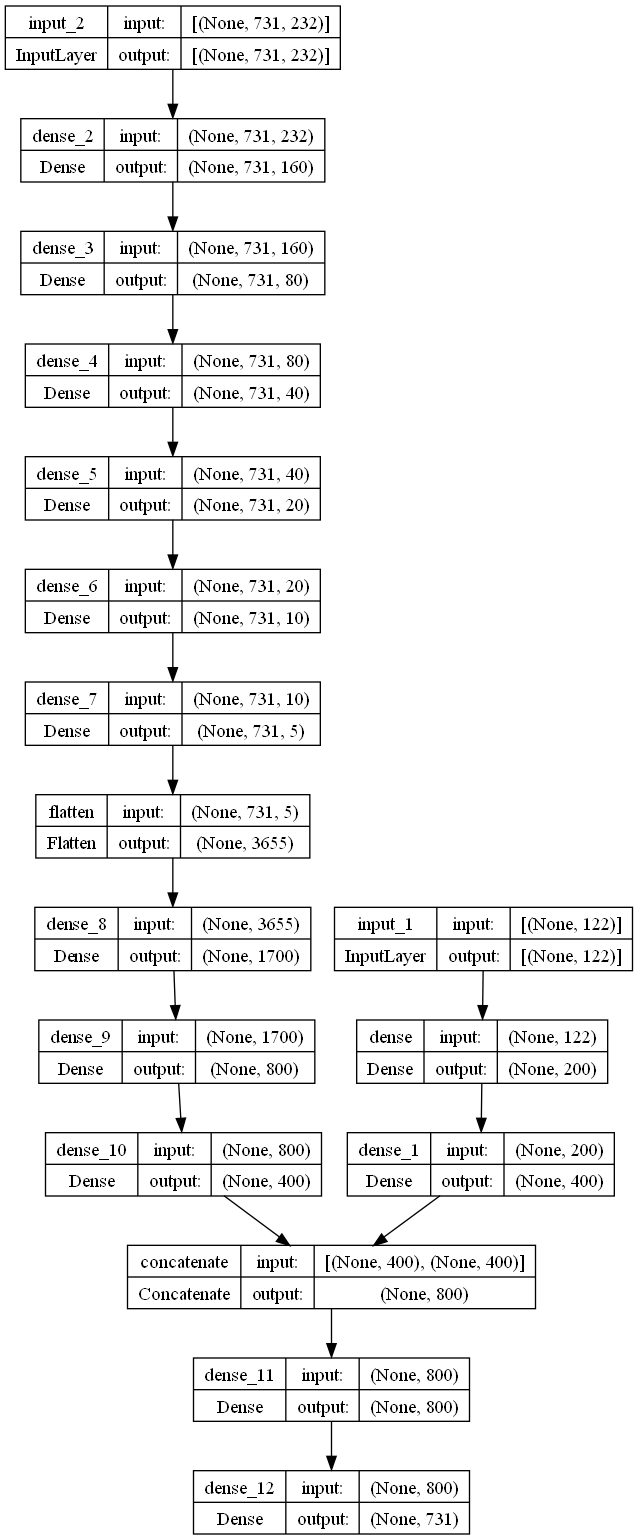

In [20]:
from tensorflow import keras

slot_input = keras.Input(shape=(122,))
pro_input = keras.Input(shape=(731,232))
HIDEN_ACTIVATION = "relu"

x = keras.layers.Dense(200, activation=HIDEN_ACTIVATION) (slot_input)
x = keras.layers.Dense(400, activation=HIDEN_ACTIVATION) (x)
x = keras.Model(inputs=slot_input, outputs=x)

y = keras.layers.Dense(160, activation=HIDEN_ACTIVATION) (pro_input)
y = keras.layers.Dense(80, activation=HIDEN_ACTIVATION) (y)
y = keras.layers.Dense(40, activation=HIDEN_ACTIVATION) (y)
y = keras.layers.Dense(20, activation=HIDEN_ACTIVATION) (y)
y = keras.layers.Dense(10, activation=HIDEN_ACTIVATION) (y)
y = keras.layers.Dense(5, activation=HIDEN_ACTIVATION) (y)
y = keras.layers.Flatten() (y)
y = keras.layers.Dense(1700, activation=HIDEN_ACTIVATION) (y)
y = keras.layers.Dense(800, activation=HIDEN_ACTIVATION) (y)
y = keras.layers.Dense(400, activation=HIDEN_ACTIVATION) (y)
y = keras.Model(inputs=pro_input, outputs=y)

combine = keras.layers.concatenate([x.output, y.output])

z = keras.layers.Dense(800, activation=HIDEN_ACTIVATION) (combine)
z = keras.layers.Dense(731, activation="softmax") (z)

model = keras.Model(inputs=[x.input, y.input], outputs=z)

print(model.input_shape, model.output_shape)

model.compile(
      optimizer=keras.optimizers.Adamax(1e-3),
      loss=[keras.losses.SparseCategoricalCrossentropy(from_logits=True)],
      metrics=[keras.metrics.SparseCategoricalCrossentropy()]
)

model.summary()

keras.utils.plot_model(model, "first_model.png", True)

In [21]:
# dtst = keras.utils.to_categorical(dataset.choose_from_datasets(dataset, [0]), dtype="float32")
history = model.fit([categ, pd_ndt], idex, epochs=60, validation_data=([categ, pd_ndt], idex2))

Epoch 1/60


d:\pessProjects\coolab_tensorflow_study\lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


23/23 [==============================] - ETA: 0s - loss: 6.6775 - sparse_categorical_crossentropy: 6.6775

d:\pessProjects\coolab_tensorflow_study\lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


23/23 [==============================] - 9s 315ms/step - loss: 6.6775 - sparse_categorical_crossentropy: 6.6775 - val_loss: 6.5953 - val_sparse_categorical_crossentropy: 6.5953
Epoch 2/60
23/23 [==============================] - 6s 260ms/step - loss: 6.5889 - sparse_categorical_crossentropy: 6.5889 - val_loss: 6.5954 - val_sparse_categorical_crossentropy: 6.5954
Epoch 3/60
23/23 [==============================] - 6s 280ms/step - loss: 6.5683 - sparse_categorical_crossentropy: 6.5683 - val_loss: 6.5961 - val_sparse_categorical_crossentropy: 6.5961
Epoch 4/60
23/23 [==============================] - 6s 243ms/step - loss: 6.5359 - sparse_categorical_crossentropy: 6.5359 - val_loss: 6.5974 - val_sparse_categorical_crossentropy: 6.5974
Epoch 5/60
23/23 [==============================] - 6s 244ms/step - loss: 6.4756 - sparse_categorical_crossentropy: 6.4756 - val_loss: 6.6022 - val_sparse_categorical_crossentropy: 6.6022
Epoch 6/60
23/23 [==============================] - 6s 247ms/step - los

{'loss': [6.6774678230285645, 6.588918685913086, 6.56825065612793, 6.535948276519775, 6.475572109222412, 6.35867166519165, 6.15354585647583, 5.837282657623291, 5.436048984527588, 5.0385870933532715, 4.68645715713501, 4.392988204956055, 4.1597208976745605, 3.9665613174438477, 3.802323341369629, 3.663017749786377, 3.54651141166687, 3.440795421600342, 3.3458807468414307, 3.2709217071533203, 3.196258306503296, 3.13594651222229, 3.0655405521392822, 3.008890151977539, 2.963890790939331, 2.8973758220672607, 2.8547463417053223, 2.80708384513855, 2.7751145362854004, 2.733752965927124, 2.6927738189697266, 2.6546356678009033, 2.6355435848236084, 2.6009440422058105, 2.563990592956543, 2.535970687866211, 2.5218753814697266, 2.4877772331237793, 2.471125841140747, 2.4346141815185547, 2.4098823070526123, 2.4306282997131348, 2.405513286590576, 2.3765764236450195, 2.3588807582855225, 2.3492050170898438, 2.327558755874634, 2.3044421672821045, 2.302166223526001, 2.293458938598633, 2.2884368896484375, 2.27

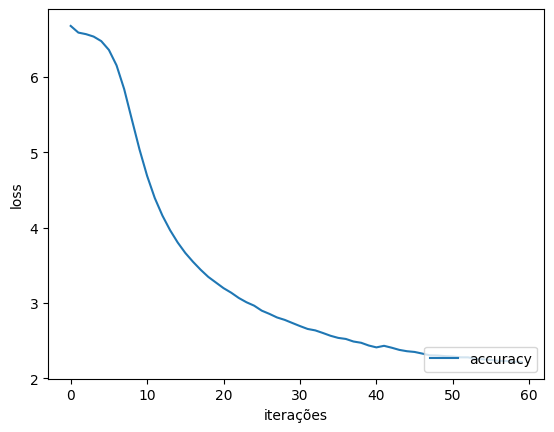

In [22]:
import matplotlib.pyplot as plt

print(history.history)
plt.plot(history.history['loss'], label='accuracy')
# plt.plot(history.history['logcosh'], label= 'logcosh')
plt.xlabel('iterações')
plt.ylabel('loss')
# plt.ylim([0,2])
plt.legend(loc='lower right')

test_loss, test_acc, *outros = model.evaluate([categ, pd_ndt], idex, verbose=2)

In [32]:
strData = strData.loc[vc2['login.uid']]
print(strData.shape, categ.shape)

(731, 4) (731, 122)


In [28]:
test = categ.iloc[0:100]
print(test.shape)
# mt = np.matrix([pd_ndt[0]])
zside = []
for k in test.values:
    zside.append(pd_ndt[0])
side = np.array(zside)

predition = model.predict([test, side])

(100, 122)
4/4 [==============================] - 0s 56ms/step


In [34]:
i = 0
for r in predition:
    earlyIndex = 0 + i
    candidate_index = np.argmax(r)
    print('Vaga: {}, Escolhido: {}'.format(strData.iloc[earlyIndex]['experience_jobTitle'], df.iloc[candidate_index]['jobTitle']))
    i += 1

Vaga: quality assurance engineer, Escolhido: developer front-end
Vaga: developer mobile, Escolhido: scrum master
Vaga: developer back-end, Escolhido: developer front-end
Vaga: cyber security engineer, Escolhido: developer front-end
Vaga: tech lead, Escolhido: developer front-end
Vaga: developer full-stack, Escolhido: developer mobile
Vaga: project manager, Escolhido: digital designer
Vaga: , Escolhido: developer front-end
Vaga: quality assurance engineer, Escolhido: developer front-end
Vaga: developer full-stack, Escolhido: developer back-end
Vaga: business development representative, Escolhido: developer mobile
Vaga: developer front-end, Escolhido: developer full-stack
Vaga: developer full-stack, Escolhido: ux designer
Vaga: developer full-stack, Escolhido: developer full-stack
Vaga: ux / ui designer, Escolhido: developer full-stack
Vaga: developer full-stack, Escolhido: devops engineer
Vaga: cto, Escolhido: developer back-end
Vaga: , Escolhido: developer back-end
Vaga: developer full

In [80]:
candidate_index = np.argmax(predition[3])

print(predition[3][candidate_index], candidate_index)

0.020099256 26


In [81]:
print(df.iloc[candidate_index]['jobTitle'])
strData.iloc[503]['experience_jobTitle']

tech lead


'ND'